Dataset Shape: (5728, 2)
Column Names: Index(['Email Text', 'Spam or Not Spam'], dtype='object')

First 5 rows:
                                          Email Text Spam or Not Spam
0  Subject: naturally irresistible your corporate...             Spam
1  Subject: the stock trading gunslinger  fanny i...             Spam
2  Subject: unbelievable new homes made easy  im ...             Spam
3  Subject: 4 color printing special  request add...             Spam
4  Subject: do not have money , get software cds ...             Spam

Missing Values:
Email Text          0
Spam or Not Spam    0
dtype: int64

Text Length Statistics:
count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: Text Length, dtype: float64


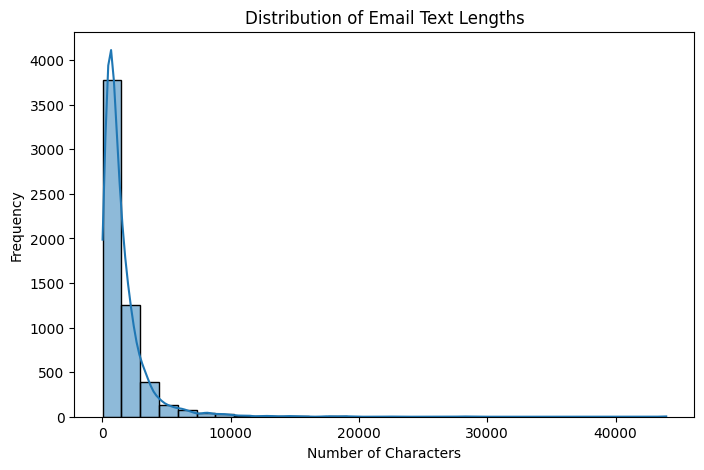


Most Common Words in Spam Emails:
[('_', 13556), ('the', 8975), ('to', 8165), ('and', 6517), ('of', 5629), ('you', 4920), ('a', 4700), ('in', 3886), ('your', 3730), ('for', 3186), ('is', 2977), ('this', 2822), ('that', 1896), ('i', 1777), ('with', 1734), ('we', 1724), ('be', 1675), ('are', 1590), ('or', 1588), ('it', 1584)]

Most Common Words in Not Spam Emails:
[('the', 41135), ('to', 33571), ('and', 20961), ('of', 18128), ('i', 15649), ('a', 15250), ('you', 14234), ('in', 14096), ('for', 13510), ('enron', 13382), ('ect', 11417), ('on', 11137), ('is', 9618), ('subject', 8605), ('vince', 8531), ('be', 7587), ('that', 7395), ('this', 7209), ('with', 7119), ('we', 6964)]


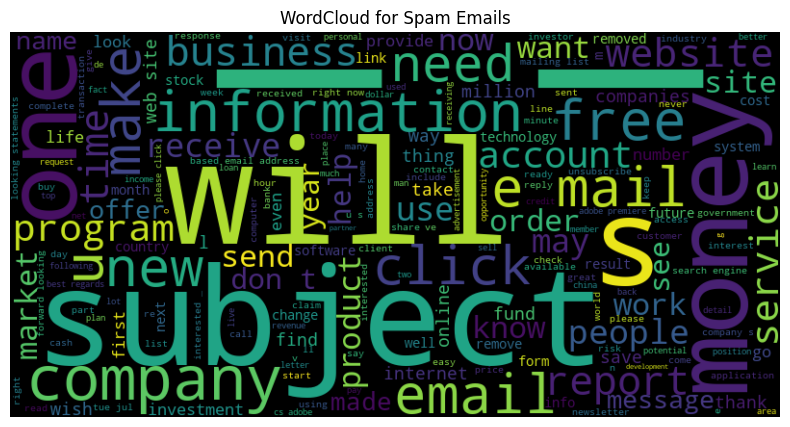

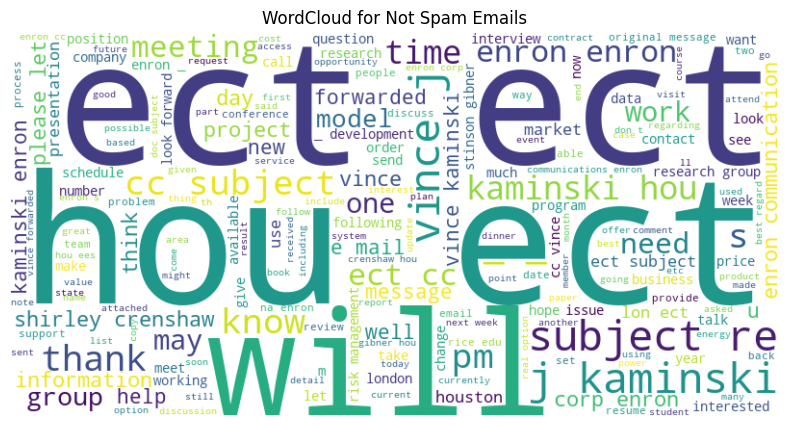

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

df = pd.read_csv(r"C:\Users\Brian\wrangling\DS4004-Project1\data\emails.csv")

# Replace spam labels
df = df.replace({'spam': {1: 'Spam', 0: 'Not Spam'}})

#rename columns for clarity
df = df.rename(columns={'spam': 'Spam or Not Spam', 'text': 'Email Text'})

# Displaying basic dataset info
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing vals
print("\nMissing Values:")
print(df.isnull().sum())

# Summary of text lengths
df["Text Length"] = df["Email Text"].apply(lambda x: len(str(x)))
print("\nText Length Statistics:")
print(df["Text Length"].describe())

#visualize distribution of email lengths
plt.figure(figsize=(8, 5))
sns.histplot(df["Text Length"], bins=30, kde=True)
plt.title("Distribution of Email Text Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# word frequency analyssis
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = text.split()
    return words

# Flatten word lists for each category
spam_words = []
not_spam_words = []

for index, row in df.iterrows():
    words = preprocess_text(str(row["Email Text"]))
    if row["Spam or Not Spam"] == "Spam":
        spam_words.extend(words)
    else:
        not_spam_words.extend(words)

# Getting most common words in each category
spam_common = Counter(spam_words).most_common(20)
not_spam_common = Counter(not_spam_words).most_common(20)

print("\nMost Common Words in Spam Emails:")
print(spam_common)

print("\nMost Common Words in Not Spam Emails:")
print(not_spam_common)

# word cloud visualization for spam emails
spam_text = " ".join(spam_words)
wordcloud_spam = WordCloud(width=800, height=400, background_color="black").generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Spam Emails")
plt.show()

# wword cloud visualization for non-spam emails
not_spam_text = " ".join(not_spam_words)
wordcloud_not_spam = WordCloud(width=800, height=400, background_color="white").generate(not_spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_spam, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Not Spam Emails")
plt.show()
